# Ensemble Learning
Author: Magdalena Whelley
## 1. Overview
Ensemble learning combines multiple weak or moderately strong models to create a more robust and accurate predictor. The central idea is that groups of diverse learners, when combined intelligently, often outperform any single model.

This notebook demonstrates three major ensemble techniques using scikit-learn:
- Bagging (Bootstrap Aggregating)
- Random Forests
- Boosting (AdaBoost & Gradient Boosting)

This notebook applies these models to the Breast Cancer Wisconsin Diagnostic dataset. The notebook will:
- load and standardize the dataset
- train multiple ensemble classifiers
- compare their performance
- analyze confusion matrices and metrics
- interpret feature importances

In [1]:
# 2. Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [2]:
# 3. Load and Inspect Data
data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# 4. Train-Test Split and Standardization
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 5. Bagging Classifier
bag = BaggingClassifier(
    n_estimators=200,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)

bag.fit(X_train_scaled, y_train)
bag_pred = bag.predict(X_test_scaled)

bag_acc = accuracy_score(y_test, bag_pred)
print("Bagging Accuracy:", bag_acc)
print(confusion_matrix(y_test, bag_pred))
print(classification_report(y_test, bag_pred))

Bagging Accuracy: 0.958041958041958
[[51  3]
 [ 3 86]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [7]:
# 6. Random Forest Classifier 
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)  # RF handles unscaled data well
rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.965034965034965
[[51  3]
 [ 2 87]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



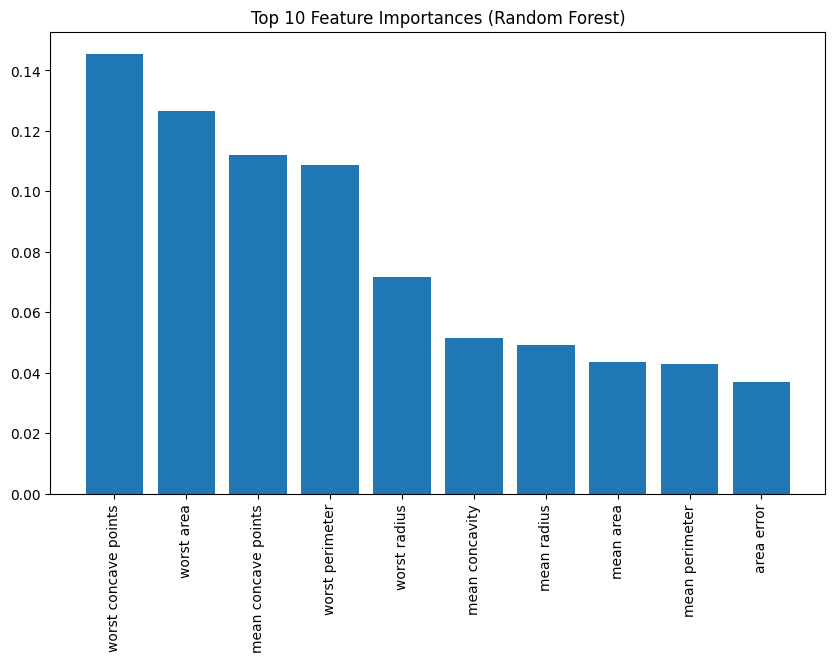

In [8]:
# 7. Feature Importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(10), importances[indices][:10])
plt.xticks(range(10), df.columns[indices][:10], rotation=90)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [9]:
# 8. AdaBoost Classifier 
ada = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

ada.fit(X_train_scaled, y_train)
ada_pred = ada.predict(X_test_scaled)

ada_acc = accuracy_score(y_test, ada_pred)
print("AdaBoost Accuracy:", ada_acc)
print(confusion_matrix(y_test, ada_pred))
print(classification_report(y_test, ada_pred))


AdaBoost Accuracy: 0.958041958041958
[[52  2]
 [ 4 85]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.98      0.96      0.97        89

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [10]:
# 9. Gradient Boosting Classifier
gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train_scaled, y_train)
gb_pred = gb.predict(X_test_scaled)

gb_acc = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Accuracy:", gb_acc)
print(confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.958041958041958
[[51  3]
 [ 3 86]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [ ]:
# 10. Performance Comparison
print("Accuracy Comparison:")
print(f"Bagging: {bag_acc:.4f}")
print(f"Random Forest: {rf_acc:.4f}")
print(f"AdaBoost: {ada_acc:.4f}")
print(f"Gradient Boosting: {gb_acc:.4f}")

Accuracy Comparison:
Bagging:           0.9580
Random Forest:     0.9650
AdaBoost:          0.9580
Gradient Boosting: 0.9580


## 11. Conclusion
All ensemble methods demonstrated strong performance on the Breast Cancer Wisconsin dataset, with accuracies ranging from 0.958 to 0.965. Even the simplest ensemble technique (Bagging with decision trees) achieved high classification accuracy and balanced precision/recall across both benign and malignant classes. Both Bagging and AdaBoost produced identical performance, correctly classifying nearly all malignant samples and misclassifying only a small number of benign tumors.

Gradient Boosting matched this performance, again achieving 0.958 accuracy, with confusion matrices showing symmetric error patterns across the two classes. These results illustrate how boosting methods sequentially refine decision boundaries and reduce bias, especially in high-dimensional biomedical datasets.

Random Forests provided the best overall performance with an accuracy of 0.965, the lowest number of total misclassifications, and the highest F1-scores for both classes. The feature importance analysis highlights the biological relevance of several tumor morphology measurements—including worst concave points, worst area, mean concave points, and worst radius. This confirms that the model is leveraging clinically meaningful structure in the data.

Overall, ensemble learning significantly enhances model stability and accuracy compared to a single decision tree. Random Forests in particular stand out as a strong default choice, offering excellent predictive performance, strong generalization, and interpretable feature importance rankings. This notebook demonstrates how ensemble methods effectively combine multiple weak learners to produce reliable, high-quality predictions in real-world classification tasks.